# Prikazovanje podatkov - osnonvo

In [1]:
import pandas as pd
import numpy as np

## Representation Of Data



## Introduction To The Data

In [ ]:
#podatki so v obliki časovne vrste (ameriška brezposelnost)

In [2]:
unrate = pd.read_csv('data/unrate.csv')

In [4]:
unrate.head

<bound method NDFrame.head of            DATE  VALUE
0    1948-01-01    3.4
1    1948-02-01    3.8
2    1948-03-01    4.0
3    1948-04-01    3.9
4    1948-05-01    3.5
..          ...    ...
819  2016-04-01    5.0
820  2016-05-01    4.7
821  2016-06-01    4.9
822  2016-07-01    4.9
823  2016-08-01    4.9

[824 rows x 2 columns]>

In [5]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    824 non-null    object 
 1   VALUE   824 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [6]:
unrate['DATE'] = pd.to_datetime(unrate['DATE']) #pretvorba v datetime format

In [7]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [8]:
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


## Introduction to matplotlib

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt #čudežna metoda, da jupyter notebook dobro dela z matplotlibom

In [12]:
import matplotlib
print(f'matplotlib: {matplotlib.__version__}')

matplotlib: 3.1.3


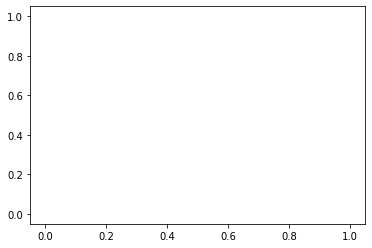

In [13]:
plt.plot()
plt.show() #prazen graf

## Axis Ticks

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() #nekaj kar je treba pognat, ker se bo nekaj spremenilo

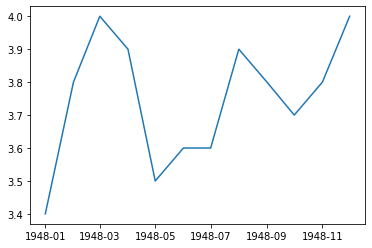

In [18]:
first_12 = unrate[0:12] #graf za prvih 12 mesecev
plt.plot(first_12['DATE'], first_12['VALUE'])
plt.show()

### Fixing Axis Ticks

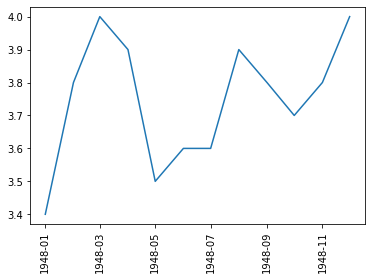

In [19]:
first_12 = unrate[0:12]
plt.plot(first_12['DATE'], first_12['VALUE'])
plt.xticks(rotation = 90) #zarotirali smo napise
plt.show()

### Adding Axis Labels And A Title

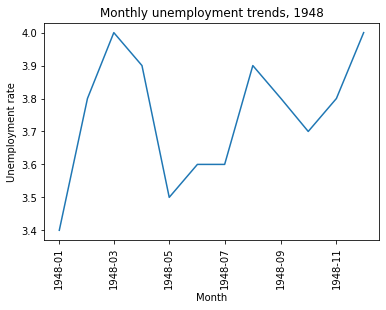

In [21]:
first_12 = unrate[0:12]
plt.plot(first_12['DATE'], first_12['VALUE'])
plt.xticks(rotation = 90) #zarotirali smo napise
plt.xlabel('Month') #dodamo oznako
plt.ylabel('Unemployment rate')
plt.title('Monthly unemployment trends, 1948')
plt.show()





## Matplotlib Classes

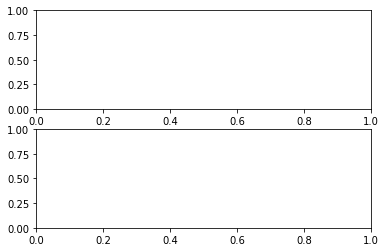

In [24]:
fig = plt.figure() #naredimo figure z dvema praznima grafoma

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

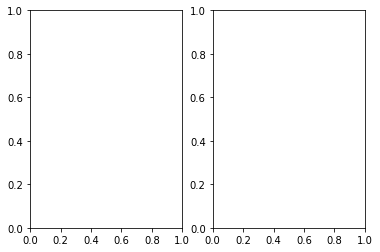

In [25]:
fig = plt.figure() #naredimo figure z dvema praznima vertikalnima grafoma

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

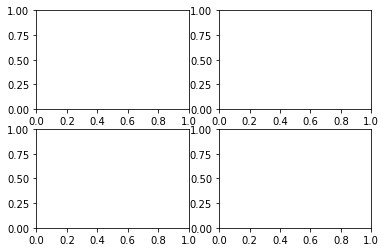

In [29]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.show()

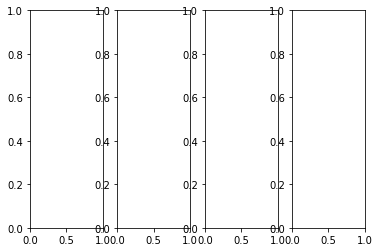

In [30]:
fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
plt.show()

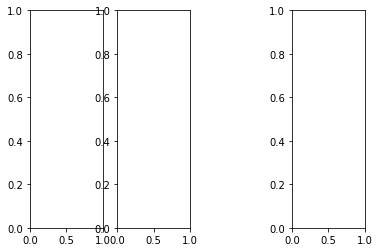

In [31]:
fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
#ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
plt.show()

## Grid Positioning


<p><img alt="Multiple Subplots" src="images/multiple_subplots.png"></p>

<p><img alt="Subplot Grid" src="images/subplot_grid.png"></p>

<p><img alt="Missing One Plot" src="images/multiple_subplots_missing_one_plot.png"></p></div>

## Adding Data

In [32]:
first_twelve = unrate[0:12]
second_twelve = unrate[12:24]

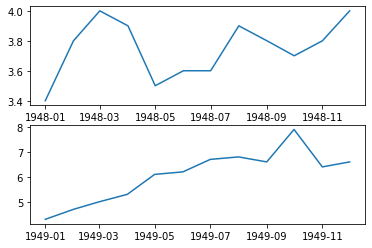

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_twelve['DATE'], first_twelve['VALUE'])
ax2.plot(second_twelve['DATE'], second_twelve['VALUE'])
plt.show()


## Formatting And Spacing

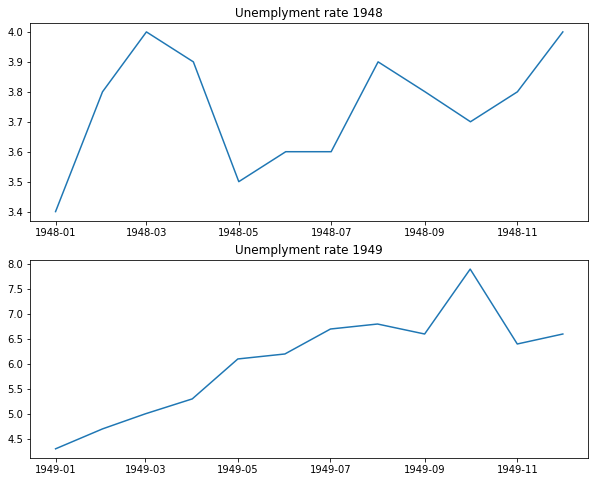

In [37]:
fig = plt.figure(figsize=(10,8)) #velikosti so v inčih
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_twelve['DATE'], first_twelve['VALUE'])
ax1.set_title('Unemplyment rate 1948')
ax2.plot(second_twelve['DATE'], second_twelve['VALUE'])
ax2.set_title('Unemplyment rate 1949') #stvari se potem vežejo na axese
plt.show()

plt.show()

## Comparing Across More Years

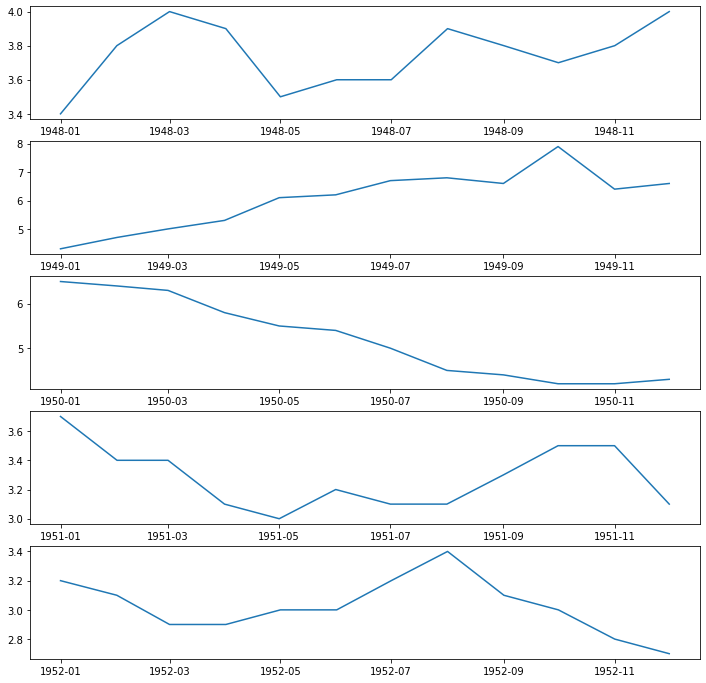

In [39]:
fig = plt.figure(figsize=(12,12))
for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    #print(subset)
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

## Overlaying Line Charts

In [ ]:
#več črt na en graf
#najprej je potrebno urediti podatke, tako da se leto nekako zanemari in se vlečemo samo skozi mesece

In [42]:
unrate['MONTH'] = unrate['DATE'].dt.month
unrate.head(15)

,DATE,VALUE,MONTH
0,1948-01-01,3.4,1
1,1948-02-01,3.8,2
2,1948-03-01,4.0,3
3,1948-04-01,3.9,4
4,1948-05-01,3.5,5
5,1948-06-01,3.6,6
6,1948-07-01,3.6,7
7,1948-08-01,3.9,8
8,1948-09-01,3.8,9
9,1948-10-01,3.7,10


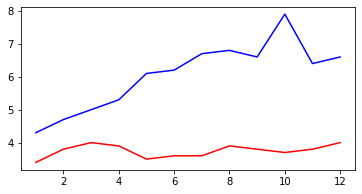

In [50]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')


plt.show()

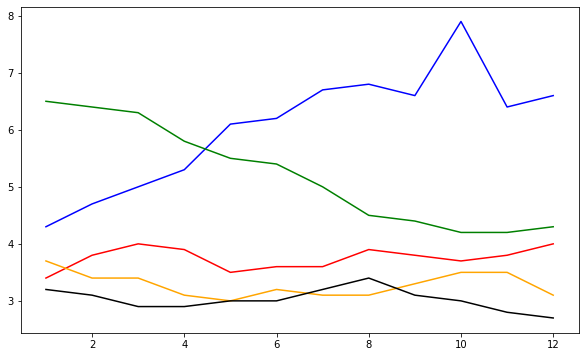

In [51]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])

plt.show()

## Adding A Legend

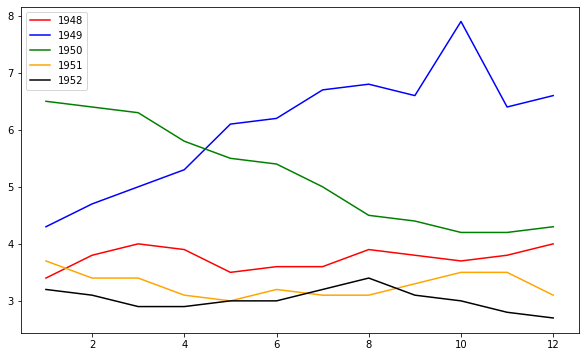

In [52]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

    
    
    
plt.legend(loc='upper left')    #lokacija legende
plt.show()

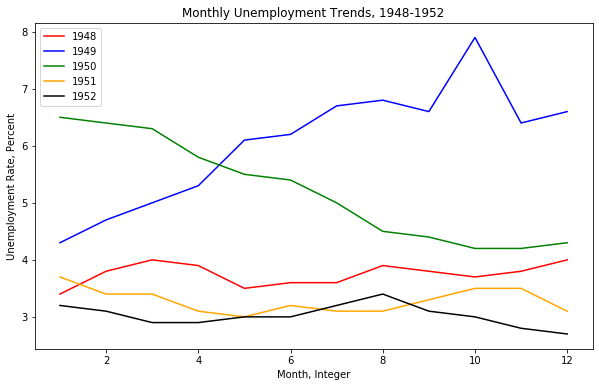

In [53]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

## Introduction to the data

In [54]:
import pandas as pd

In [55]:
reviews = pd.read_csv('data/fandango_scores.csv')

In [57]:
reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [58]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 
        'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [59]:
norm_reviews = reviews[cols]

In [60]:
norm_reviews

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.00,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.50,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.20,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0,3.5
...,...,...,...,...,...,...
141,Mr. Holmes (2015),3.90,3.95,3.70,4.0,4.0
142,'71 (2015),4.10,3.75,3.60,3.5,3.5
143,"Two Days, One Night (2014)",3.90,4.40,3.70,3.5,3.5
144,Gett: The Trial of Viviane Amsalem (2015),4.05,3.65,3.90,3.5,3.5


## Bar Plots


<p><img alt="Vertical Bar Plot" src="images/vertical_bar_plot.png"></p>


<p><img alt="Horizontal Bar Plot" src="images/horizontal_bar_plot.png"></p>


### Creating Bars


<p><img alt="Matplotlib Barplot Positioning" src="images/matplotlib_barplot_positioning.png"></p>


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

In [63]:
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 0.75
bar_positions

array([0.75, 1.75, 2.75, 3.75, 4.75])

In [64]:
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [73]:
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_heights

array([4.3 , 3.55, 3.9 , 4.5 , 5.  ])

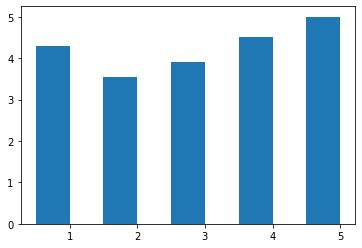

In [74]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width = 0.5)
plt.show()

### Aligning Axis Ticks And Labels

In [76]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_hights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) +0.75
tick_positions = range(1,6)




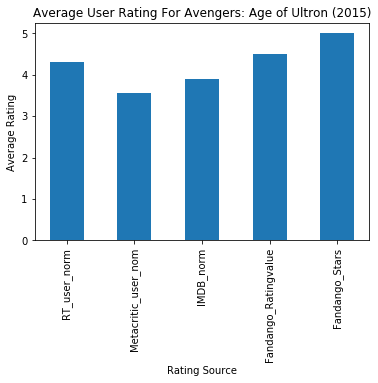

In [78]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_hights, width=0.5, align='edge')
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Horizontal Bar Plot

In [82]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_hights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) +0.75
tick_positions = range(1,6)

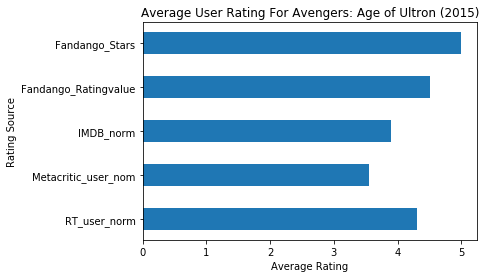

In [85]:
fig, ax = plt.subplots()

ax.barh(bar_positions, bar_hights, 0.5, align='edge')
ax.set_yticks(tick_positions)

ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## Scatter plot


<p><img alt="Imgur" src="images/scatter_plot_intro.png"></p>


In [ ]:
fig, ax = plt.subplots()




ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

### Switching axes

In [ ]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")



ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")
plt.show()

### Benchmarking correlation

In [ ]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

## Histogram

### Frequency Distribution

### Binning


<p><img alt="Binning Introduction" src="images/histogram_binning.png"></p>


### Histogram In Matplotlib

### Comparing histograms

In [ ]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

### Quartiles

## Box Plot


<p><img alt="Boxplot" src="images/boxplot_intro.png"></p>


### Multiple Box Plots

In [ ]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']



